## Notebook for the Epithelial Reference Map preparation

- **Developed by**: Anna Maguza
- **Institute of Computational Biology - Computational Health Centre - Helmholtz Munich**
- 17th February 2023

### Import required moduls

In [1]:
import scanpy as sc

In [2]:
import numpy as np
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from geosketch import gs

In [48]:
from matplotlib import axes
from matplotlib import pylab

#### Setup Cells

In [3]:
%matplotlib inline

In [4]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi = 160, color_map = 'magma_r', dpi_save = 300, vector_friendly = True)

/home/icb/anna.maguza/miniconda3/envs/geosketch_env2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.0 pandas==1.5.3 scikit-learn==1.2.1 statsmodels==0.13.5 pynndescent==0.5.8


### Upload data

In [76]:
# Downloading the data
input = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/expi_map/Reference_map_(Gut_cell_atlas+Smilie+Wang).h5ad'
output = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/expi_map/Reference_map_(Gut_cell_atlas+Smilie+Wang)_output.h5ad'

In [77]:
#Anndata upload
anndata = sc.read_h5ad(input)
anndata.X

<375293x40144 sparse matrix of type '<class 'numpy.float32'>'
	with 649526885 stored elements in Compressed Sparse Row format>

### Step 1 - create a proportion graph for cell types

In [80]:
#Rename 'nan' in 'Diagnosis' column to 'healthy'
anndata.obs['Diagnosis'] = anndata.obs['Diagnosis'].replace('nan', 'Healthy adult')
anndata.obs['Diagnosis'] = anndata.obs['Diagnosis'].replace('Healthy', 'Healthy adult')

In [81]:
#Filter epithelial cells and stem cells
#Extract Healthy adult and non-inflamed data in anndata_adult object
cells_to_keep = ["Stem Cell", "Epithelial"]
epithelial_cells = anndata.obs['CellType'].isin(cells_to_keep)
epithelial_cells = anndata[epithelial_cells, :].copy()


In [82]:
epithelial_cells.obs['Diagnosis'].value_counts()

Healthy adult        77527
fetal                46023
Pediatric healthy     7857
Non-inflamed          1030
Name: Diagnosis, dtype: int64

In [83]:
#Change nan in cell states to Stem Cell
epithelial_cells.obs['Integrated_05'] = anndata.obs['Integrated_05'].replace('nan', 'Stem Cell')

In [84]:
epithelial_cells.obs['Integrated_05'].value_counts()

TA                      47700
Enterocyte              32745
Colonocyte              13729
Proximal progenitor      8580
Stem cells               6909
                        ...  
IgM plasma cell             0
IgG plasma cell             0
IgA plasma cell             0
ILCP                        0
MPO+ mono-neutrophil        0
Name: Integrated_05, Length: 135, dtype: int64

In [85]:
#Filter adult cells
diagnoses_to_keep = ["Non-inflamed", "Healthy adult"]
epithelial_cells_adult = epithelial_cells.obs['Diagnosis'].isin(diagnoses_to_keep)
epithelial_cells_adult = epithelial_cells[epithelial_cells_adult, :].copy()

In [86]:
epithelial_cells_adult.obs['Integrated_05'].value_counts()

TA                       42915
Colonocyte               11819
Enterocyte                9420
BEST4+ epithelial         3774
BEST2+ Goblet cell        2924
Paneth                    2636
Stem Cell                 2508
Stem cells                 902
Goblet cell                641
Tuft                       563
Microfold cell             342
EC cells (TAC1+)            42
L cells (PYY+)              31
EECs                        14
I cells (CCK+)               6
N cells (NTS+)               5
D cells (SST+)               5
M/X cells (MLN/GHRL+)        4
Progenitor (NEUROG3+)        4
K cells (GIP+)               2
Name: Integrated_05, dtype: int64

In [87]:
#Extract only pediatric data
epithelial_cells_pediatric = epithelial_cells[epithelial_cells.obs['Diagnosis'] == 'Pediatric healthy']
#Extract only fetal data
epithelial_cells_fetal = epithelial_cells[epithelial_cells.obs['Diagnosis'] == 'fetal']

In [88]:
epithelial_cells_pediatric.obs['Integrated_05'].value_counts()

Enterocyte               5526
Goblet cell              1055
TA                        567
Stem cells                269
Paneth                    173
Tuft                       86
BEST4+ epithelial          64
Microfold cell             63
N cells (NTS+)             22
EC cells (TAC1+)           16
L cells (PYY+)              8
EECs                        3
D cells (SST+)              2
Progenitor (NEUROG3+)       2
BEST2+ Goblet cell          1
Name: Integrated_05, dtype: int64

In [89]:
epithelial_cells_fetal.obs['Integrated_05'].value_counts()

Enterocyte               17799
Proximal progenitor       8580
Stem cells                5738
TA                        4218
Distal progenitor         2775
Goblet cell               2269
Colonocyte                1910
BEST4+ epithelial          562
EECs                       354
EC cells (TAC1+)           329
Progenitor (NEUROG3+)      286
M/X cells (MLN/GHRL+)      264
CLDN10+ cells              223
I cells (CCK+)             192
D cells (SST+)             125
Paneth                     102
K cells (GIP+)              75
L cells (PYY+)              65
EC cells (NPW+)             57
Tuft                        39
β cells (INS+)              29
Microfold cell              25
N cells (NTS+)               5
Germ                         2
Name: Integrated_05, dtype: int64

In [90]:
#Concatenate the adult, pediatric and fetal data
epithelial_cells = ad.concat([epithelial_cells_adult, epithelial_cells_pediatric, epithelial_cells_fetal])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, 'TA'),
  Text(1, 0, 'Enterocyte'),
  Text(2, 0, 'Colonocyte'),
  Text(3, 0, 'Proximal progenitor'),
  Text(4, 0, 'Stem cells'),
  Text(5, 0, 'BEST4+ epithelial'),
  Text(6, 0, 'Goblet cell'),
  Text(7, 0, 'BEST2+ Goblet cell'),
  Text(8, 0, 'Paneth'),
  Text(9, 0, 'Distal progenitor'),
  Text(10, 0, 'Stem Cell'),
  Text(11, 0, 'Tuft'),
  Text(12, 0, 'Microfold cell'),
  Text(13, 0, 'EC cells (TAC1+)'),
  Text(14, 0, 'EECs'),
  Text(15, 0, 'Progenitor (NEUROG3+)'),
  Text(16, 0, 'M/X cells (MLN/GHRL+)'),
  Text(17, 0, 'CLDN10+ cells'),
  Text(18, 0, 'I cells (CCK+)'),
  Text(19, 0, 'D cells (SST+)'),
  Text(20, 0, 'L cells (PYY+)'),
  Text(21, 0, 'K cells (GIP+)'),
  Text(22, 0, 'EC cells (NPW+)'),
  Text(23, 0, 'N cells (NTS+)'),
  Text(24, 0, 'β cells (INS+)'),
  Text(25, 0, 'Germ')])

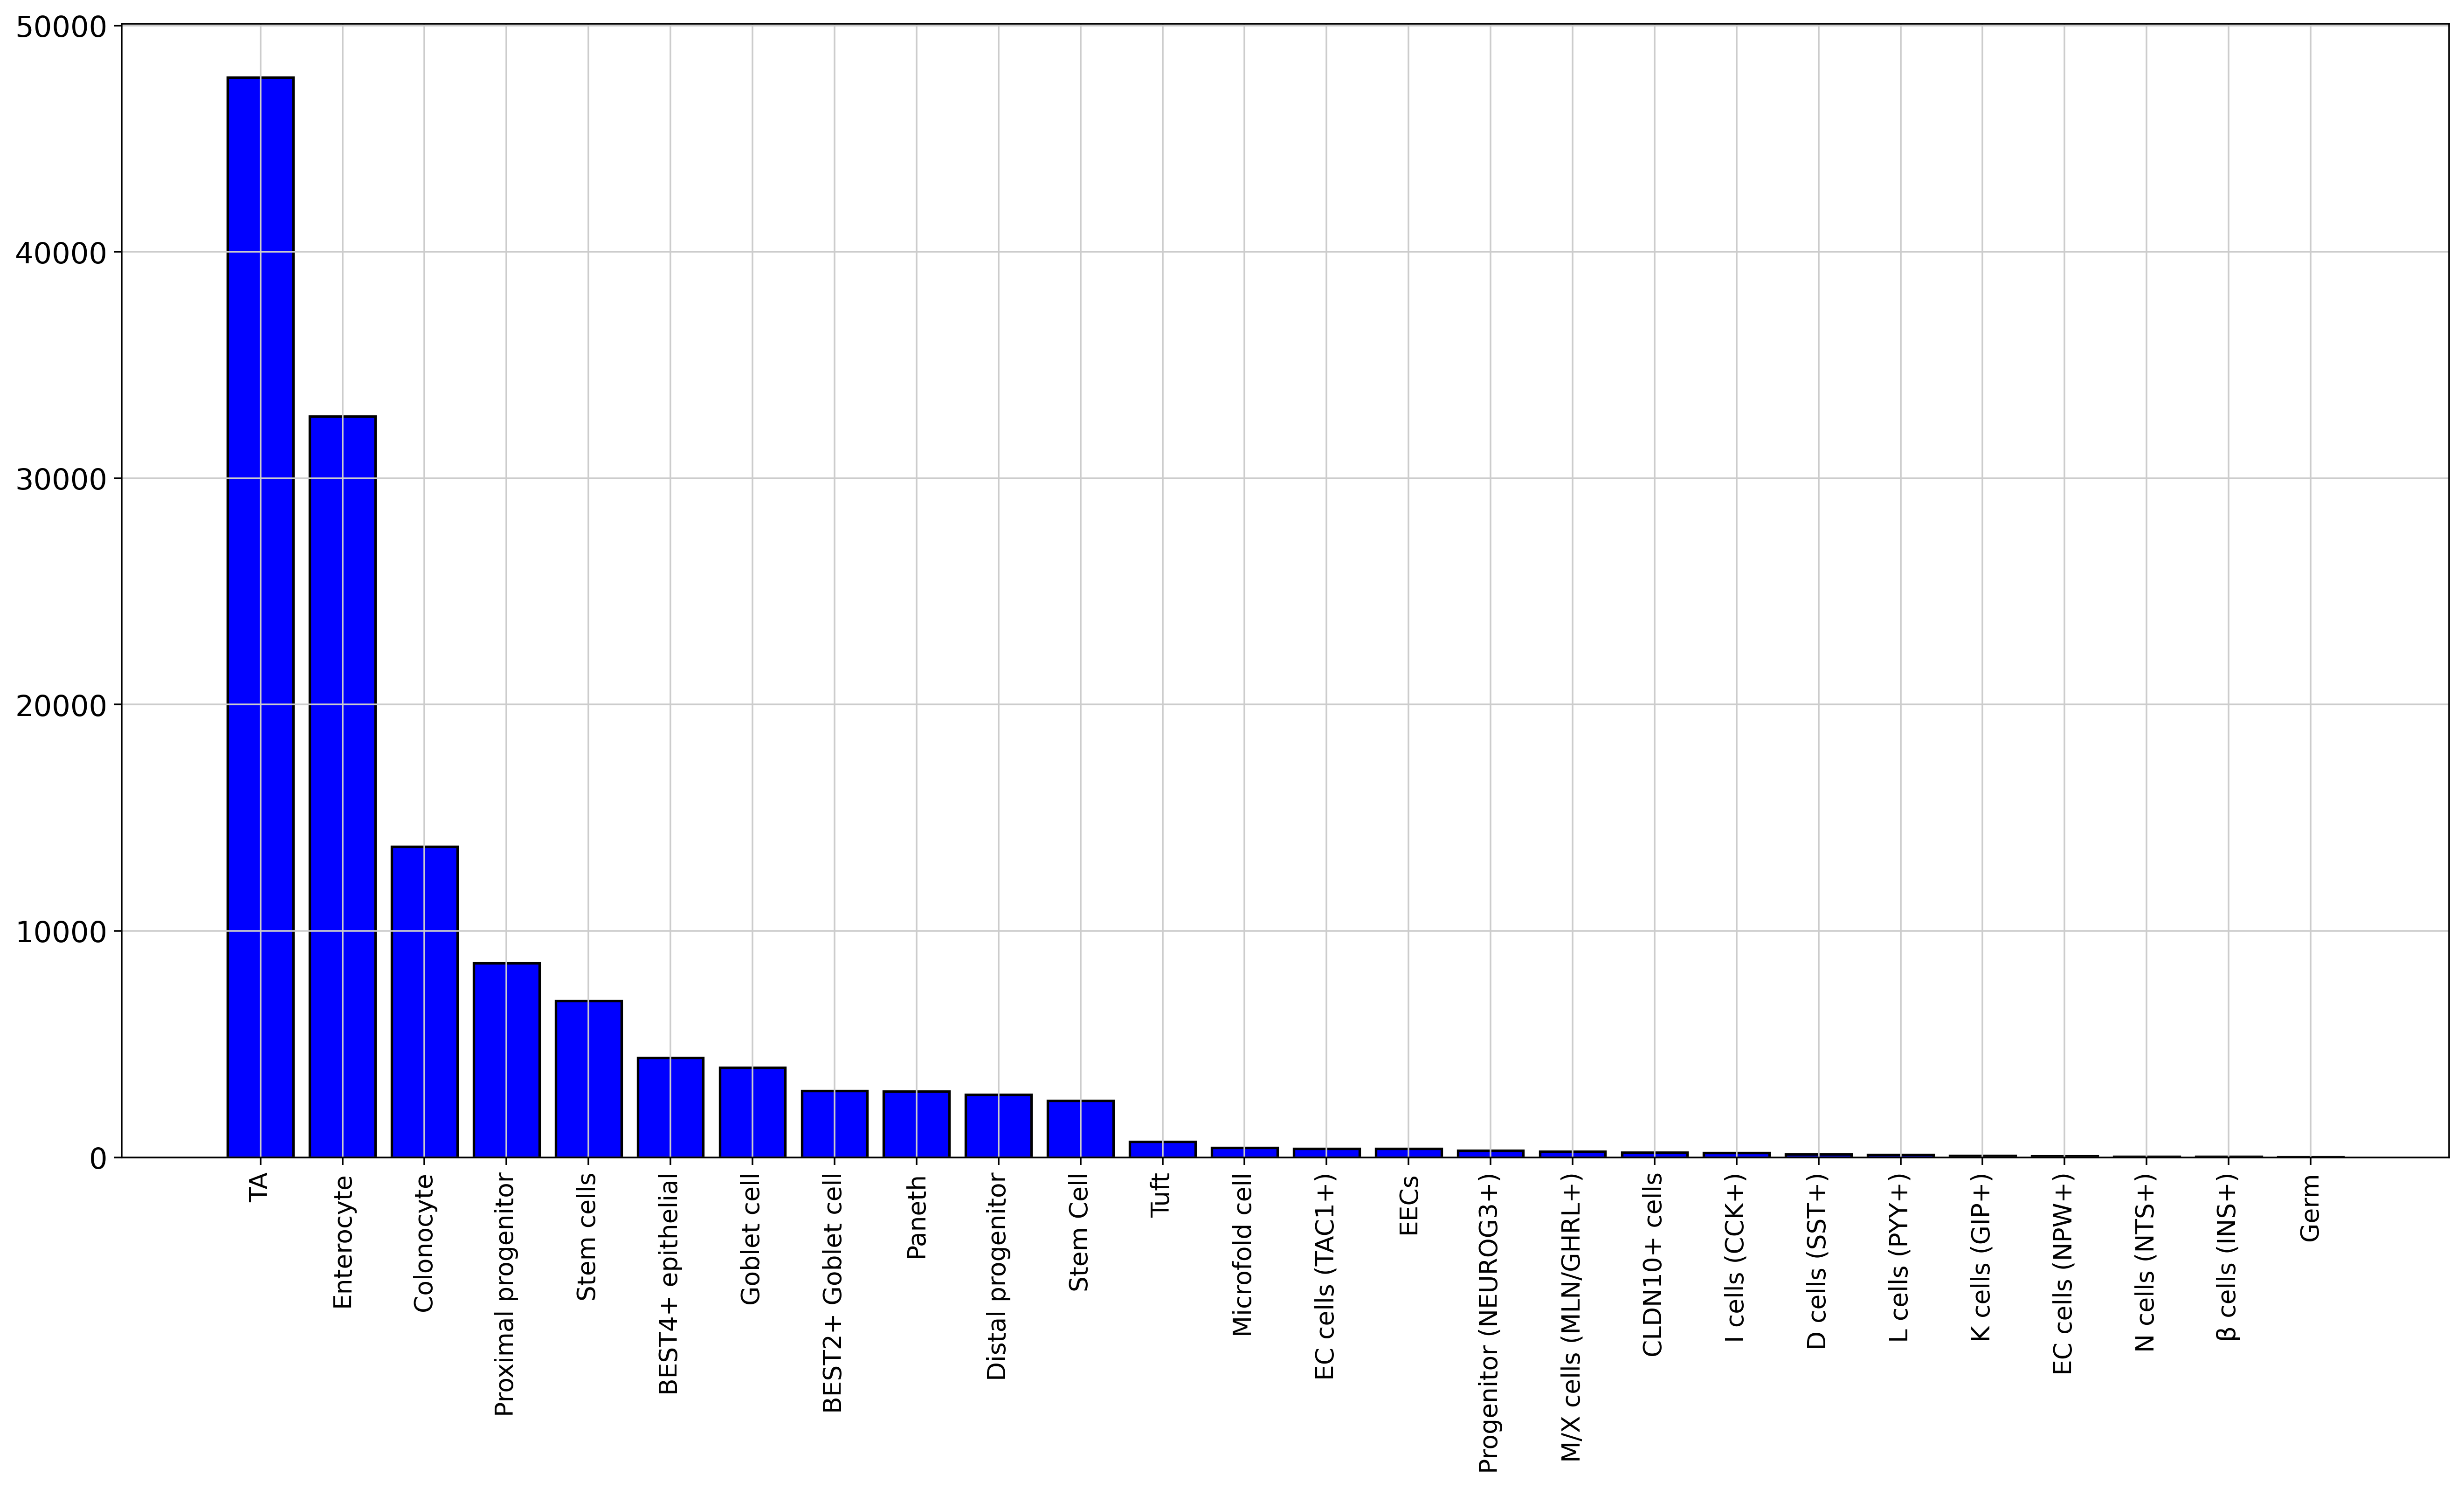

In [93]:
#Create a barplot of the number of cells per cell type in the epithelial_cells_fetal object
plt.figure(figsize = (20, 10))
plt.bar(epithelial_cells.obs["Integrated_05"].value_counts().index, epithelial_cells.obs["Integrated_05"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)
matplotlib.pyplot.xticks(rotation = 90, fontsize = 12)

In [94]:
#Combine I cells (CCK+), D cells (SST+), L cells (PYY+), K cells (GIP+), EC cells (NPW+), β cells (INS+) and N cells (NTS+) into one category "rare enteroendocrine cells"
enteroendocrine = ["I cells (CCK+)", "D cells (SST+)", "L cells (PYY+)", "K cells (GIP+)", "EC cells (NPW+)", "β cells (INS+)", "N cells (NTS+)"]
epithelial_cells.obs['Integrated_05'] = epithelial_cells.obs['Integrated_05'].replace(enteroendocrine, 'Minor_enteroendocrine_cells')

In [95]:
epithelial_cells.obs['Integrated_05'].value_counts()

TA                             47700
Enterocyte                     32745
Colonocyte                     13729
Proximal progenitor             8580
Stem cells                      6909
BEST4+ epithelial               4400
Goblet cell                     3965
BEST2+ Goblet cell              2925
Paneth                          2911
Distal progenitor               2775
Stem Cell                       2508
Tuft                             688
Minor_enteroendocrine_cells      629
Microfold cell                   430
EC cells (TAC1+)                 387
EECs                             371
Progenitor (NEUROG3+)            292
M/X cells (MLN/GHRL+)            268
CLDN10+ cells                    223
Germ                               2
Name: Integrated_05, dtype: int64

In [96]:
#Delete Germ cells 
epithelial_cells = epithelial_cells[~epithelial_cells.obs['Integrated_05'].isin(['Germ']), :]

In [97]:
epithelial_cells.obs['Integrated_05'].value_counts()

TA                             47700
Enterocyte                     32745
Colonocyte                     13729
Proximal progenitor             8580
Stem cells                      6909
BEST4+ epithelial               4400
Goblet cell                     3965
BEST2+ Goblet cell              2925
Paneth                          2911
Distal progenitor               2775
Stem Cell                       2508
Tuft                             688
Minor_enteroendocrine_cells      629
Microfold cell                   430
EC cells (TAC1+)                 387
EECs                             371
Progenitor (NEUROG3+)            292
M/X cells (MLN/GHRL+)            268
CLDN10+ cells                    223
Name: Integrated_05, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'TA'),
  Text(1, 0, 'Enterocyte'),
  Text(2, 0, 'Colonocyte'),
  Text(3, 0, 'Proximal progenitor'),
  Text(4, 0, 'Stem cells'),
  Text(5, 0, 'BEST4+ epithelial'),
  Text(6, 0, 'Goblet cell'),
  Text(7, 0, 'BEST2+ Goblet cell'),
  Text(8, 0, 'Paneth'),
  Text(9, 0, 'Distal progenitor'),
  Text(10, 0, 'Stem Cell'),
  Text(11, 0, 'Tuft'),
  Text(12, 0, 'Minor_enteroendocrine_cells'),
  Text(13, 0, 'Microfold cell'),
  Text(14, 0, 'EC cells (TAC1+)'),
  Text(15, 0, 'EECs'),
  Text(16, 0, 'Progenitor (NEUROG3+)'),
  Text(17, 0, 'M/X cells (MLN/GHRL+)'),
  Text(18, 0, 'CLDN10+ cells')])

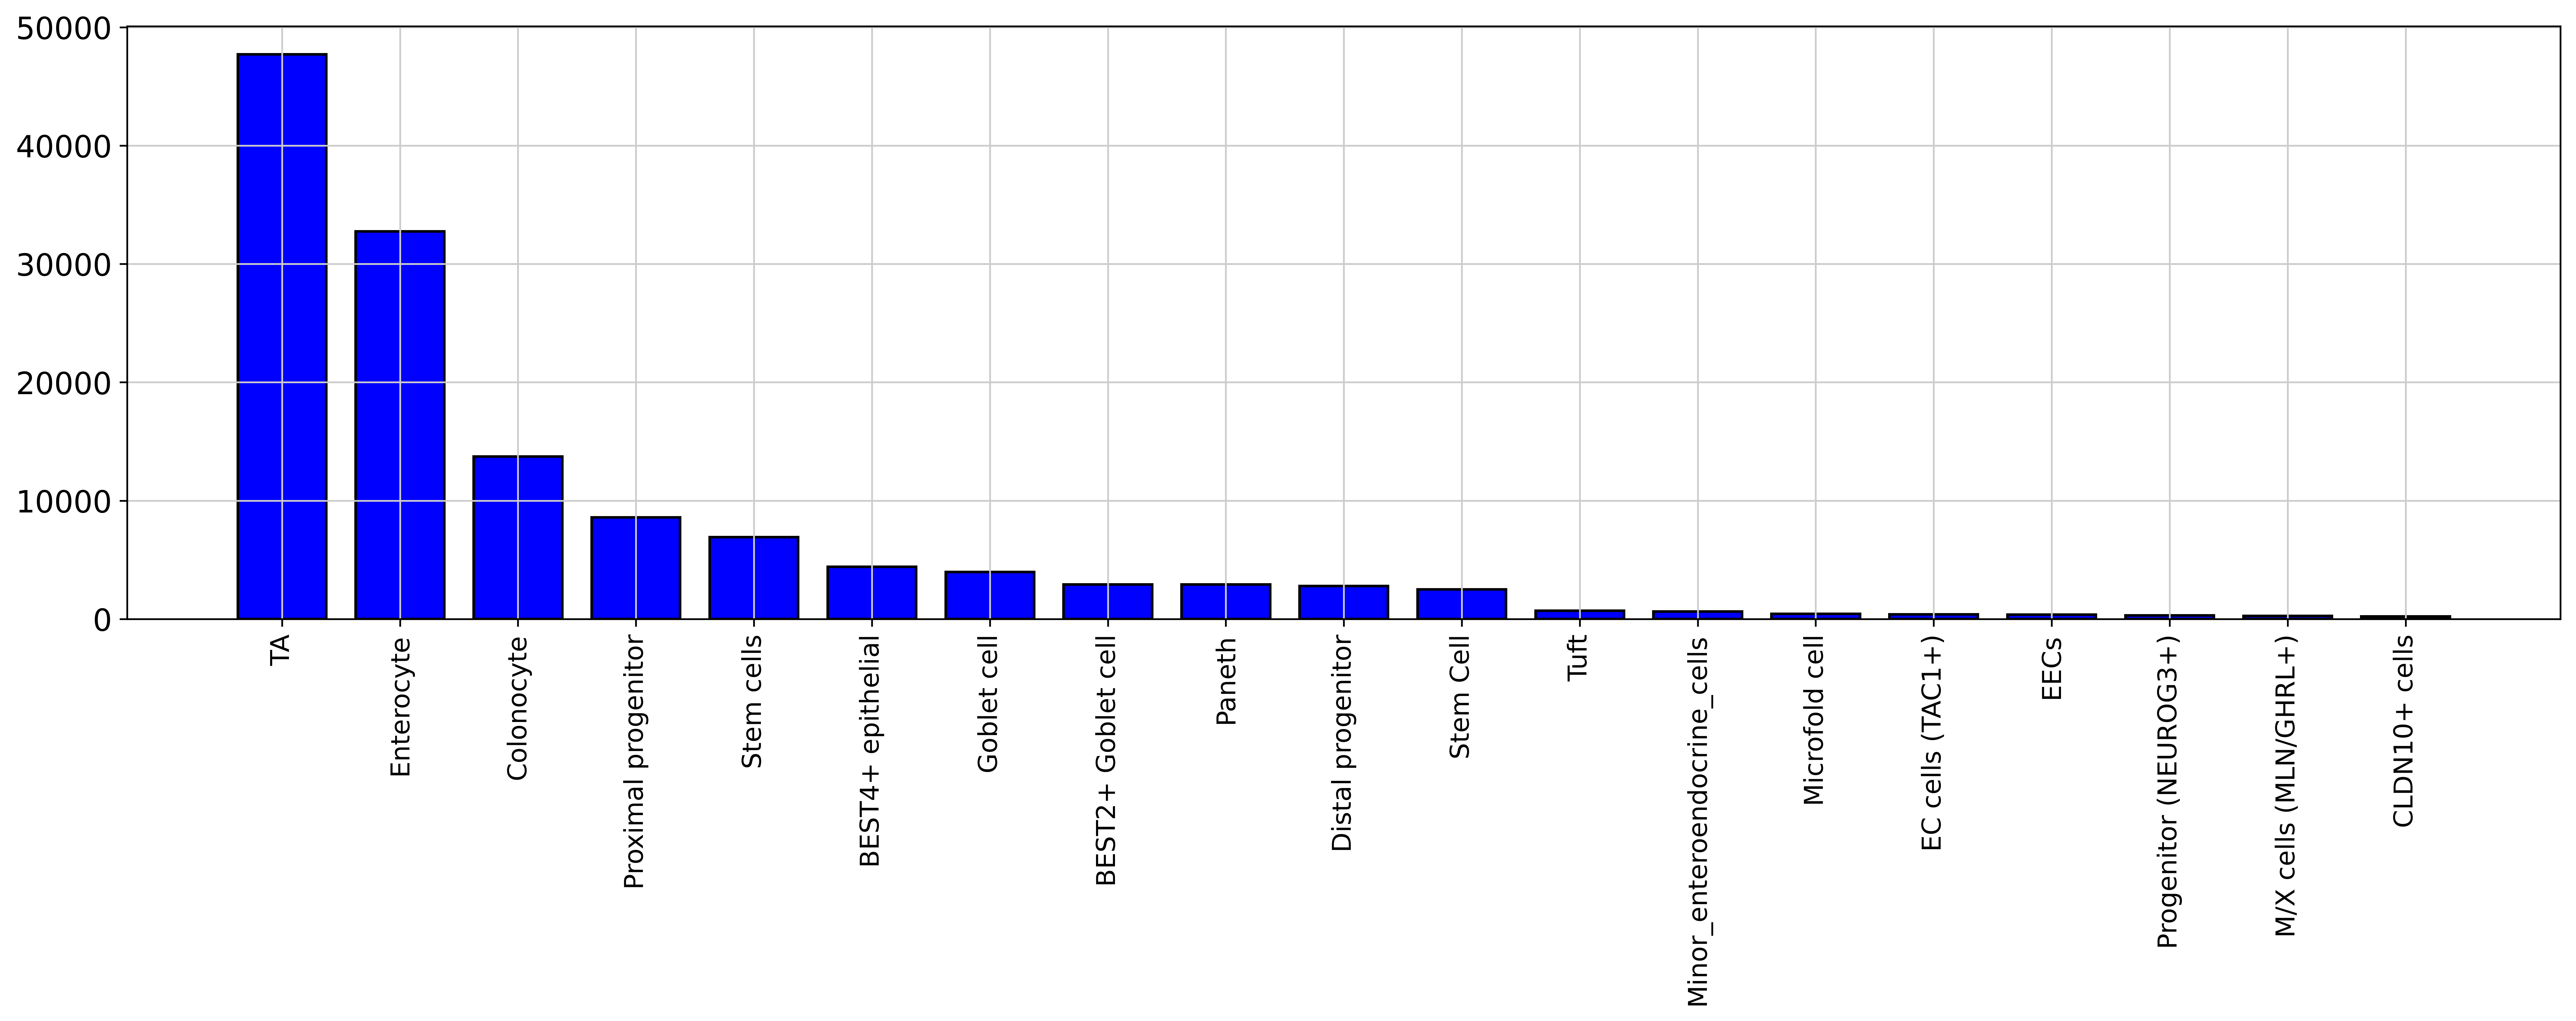

In [98]:
#Create a barplot of the number of cells per cell type in the epithelial_cells_fetal object
plt.figure(figsize = (20, 5), dpi = 300)
plt.bar(epithelial_cells.obs["Integrated_05"].value_counts().index, epithelial_cells.obs["Integrated_05"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2, width = 0.75)
matplotlib.pyplot.xticks(rotation = 90, fontsize = 12)

### Subset data with `geosketch`

In [99]:
#Extract epithelial and plasma cells from the anndata_adult object
TA = epithelial_cells[epithelial_cells.obs["Integrated_05"].isin(['TA']), :]
Enterocyte = epithelial_cells[epithelial_cells.obs["Integrated_05"].isin(['Enterocyte']), :]
Colonocyte = epithelial_cells[epithelial_cells.obs["Integrated_05"].isin(['Colonocyte']), :]

In [100]:
sc.pp.pca(TA)
sc.pp.pca(Enterocyte)

computing PCA
    with n_comps=50
    finished (0:00:27)
computing PCA
    with n_comps=50
    finished (0:00:56)


In [101]:
sc.pp.pca(Colonocyte)

computing PCA
    with n_comps=50
    finished (0:00:26)


In [102]:
N = 10000

In [103]:
sketch_index_TA = gs(TA.obsm['X_pca'], N, replace = False)
sketch_index_Enterocyte = gs(Enterocyte.obsm['X_pca'], N, replace = False)
sketch_index_Colonocyte = gs(Colonocyte.obsm['X_pca'], N, replace = False)

In [104]:
#Subset cells according to the sketch index
subset_TA = TA[TA.obs_names[sketch_index_TA]]
subset_Enterocyte = Enterocyte[Enterocyte.obs_names[sketch_index_Enterocyte]]
subset_Colonocyte = Colonocyte[Colonocyte.obs_names[sketch_index_Colonocyte]]

In [105]:
# Drop TA, Enterocyte and Plasma cells from the anndata_adult object
epithelial_cells_subset = epithelial_cells[~epithelial_cells.obs['Integrated_05'].isin(['TA', 'Enterocyte', 'Colonocyte']), :]

In [106]:
# Concatenate the subset of TA, Enterocyte and Colonocyte cells with the epithelial_cells_subset
epithelial_cells_subset = ad.concat([epithelial_cells_subset, subset_TA, subset_Enterocyte, subset_Colonocyte])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Colonocyte'),
  Text(1, 0, 'Enterocyte'),
  Text(2, 0, 'TA'),
  Text(3, 0, 'Proximal progenitor'),
  Text(4, 0, 'Stem cells'),
  Text(5, 0, 'BEST4+ epithelial'),
  Text(6, 0, 'Goblet cell'),
  Text(7, 0, 'BEST2+ Goblet cell'),
  Text(8, 0, 'Paneth'),
  Text(9, 0, 'Distal progenitor'),
  Text(10, 0, 'Stem Cell'),
  Text(11, 0, 'Tuft'),
  Text(12, 0, 'Minor_enteroendocrine_cells'),
  Text(13, 0, 'Microfold cell'),
  Text(14, 0, 'EC cells (TAC1+)'),
  Text(15, 0, 'EECs'),
  Text(16, 0, 'Progenitor (NEUROG3+)'),
  Text(17, 0, 'M/X cells (MLN/GHRL+)'),
  Text(18, 0, 'CLDN10+ cells')])

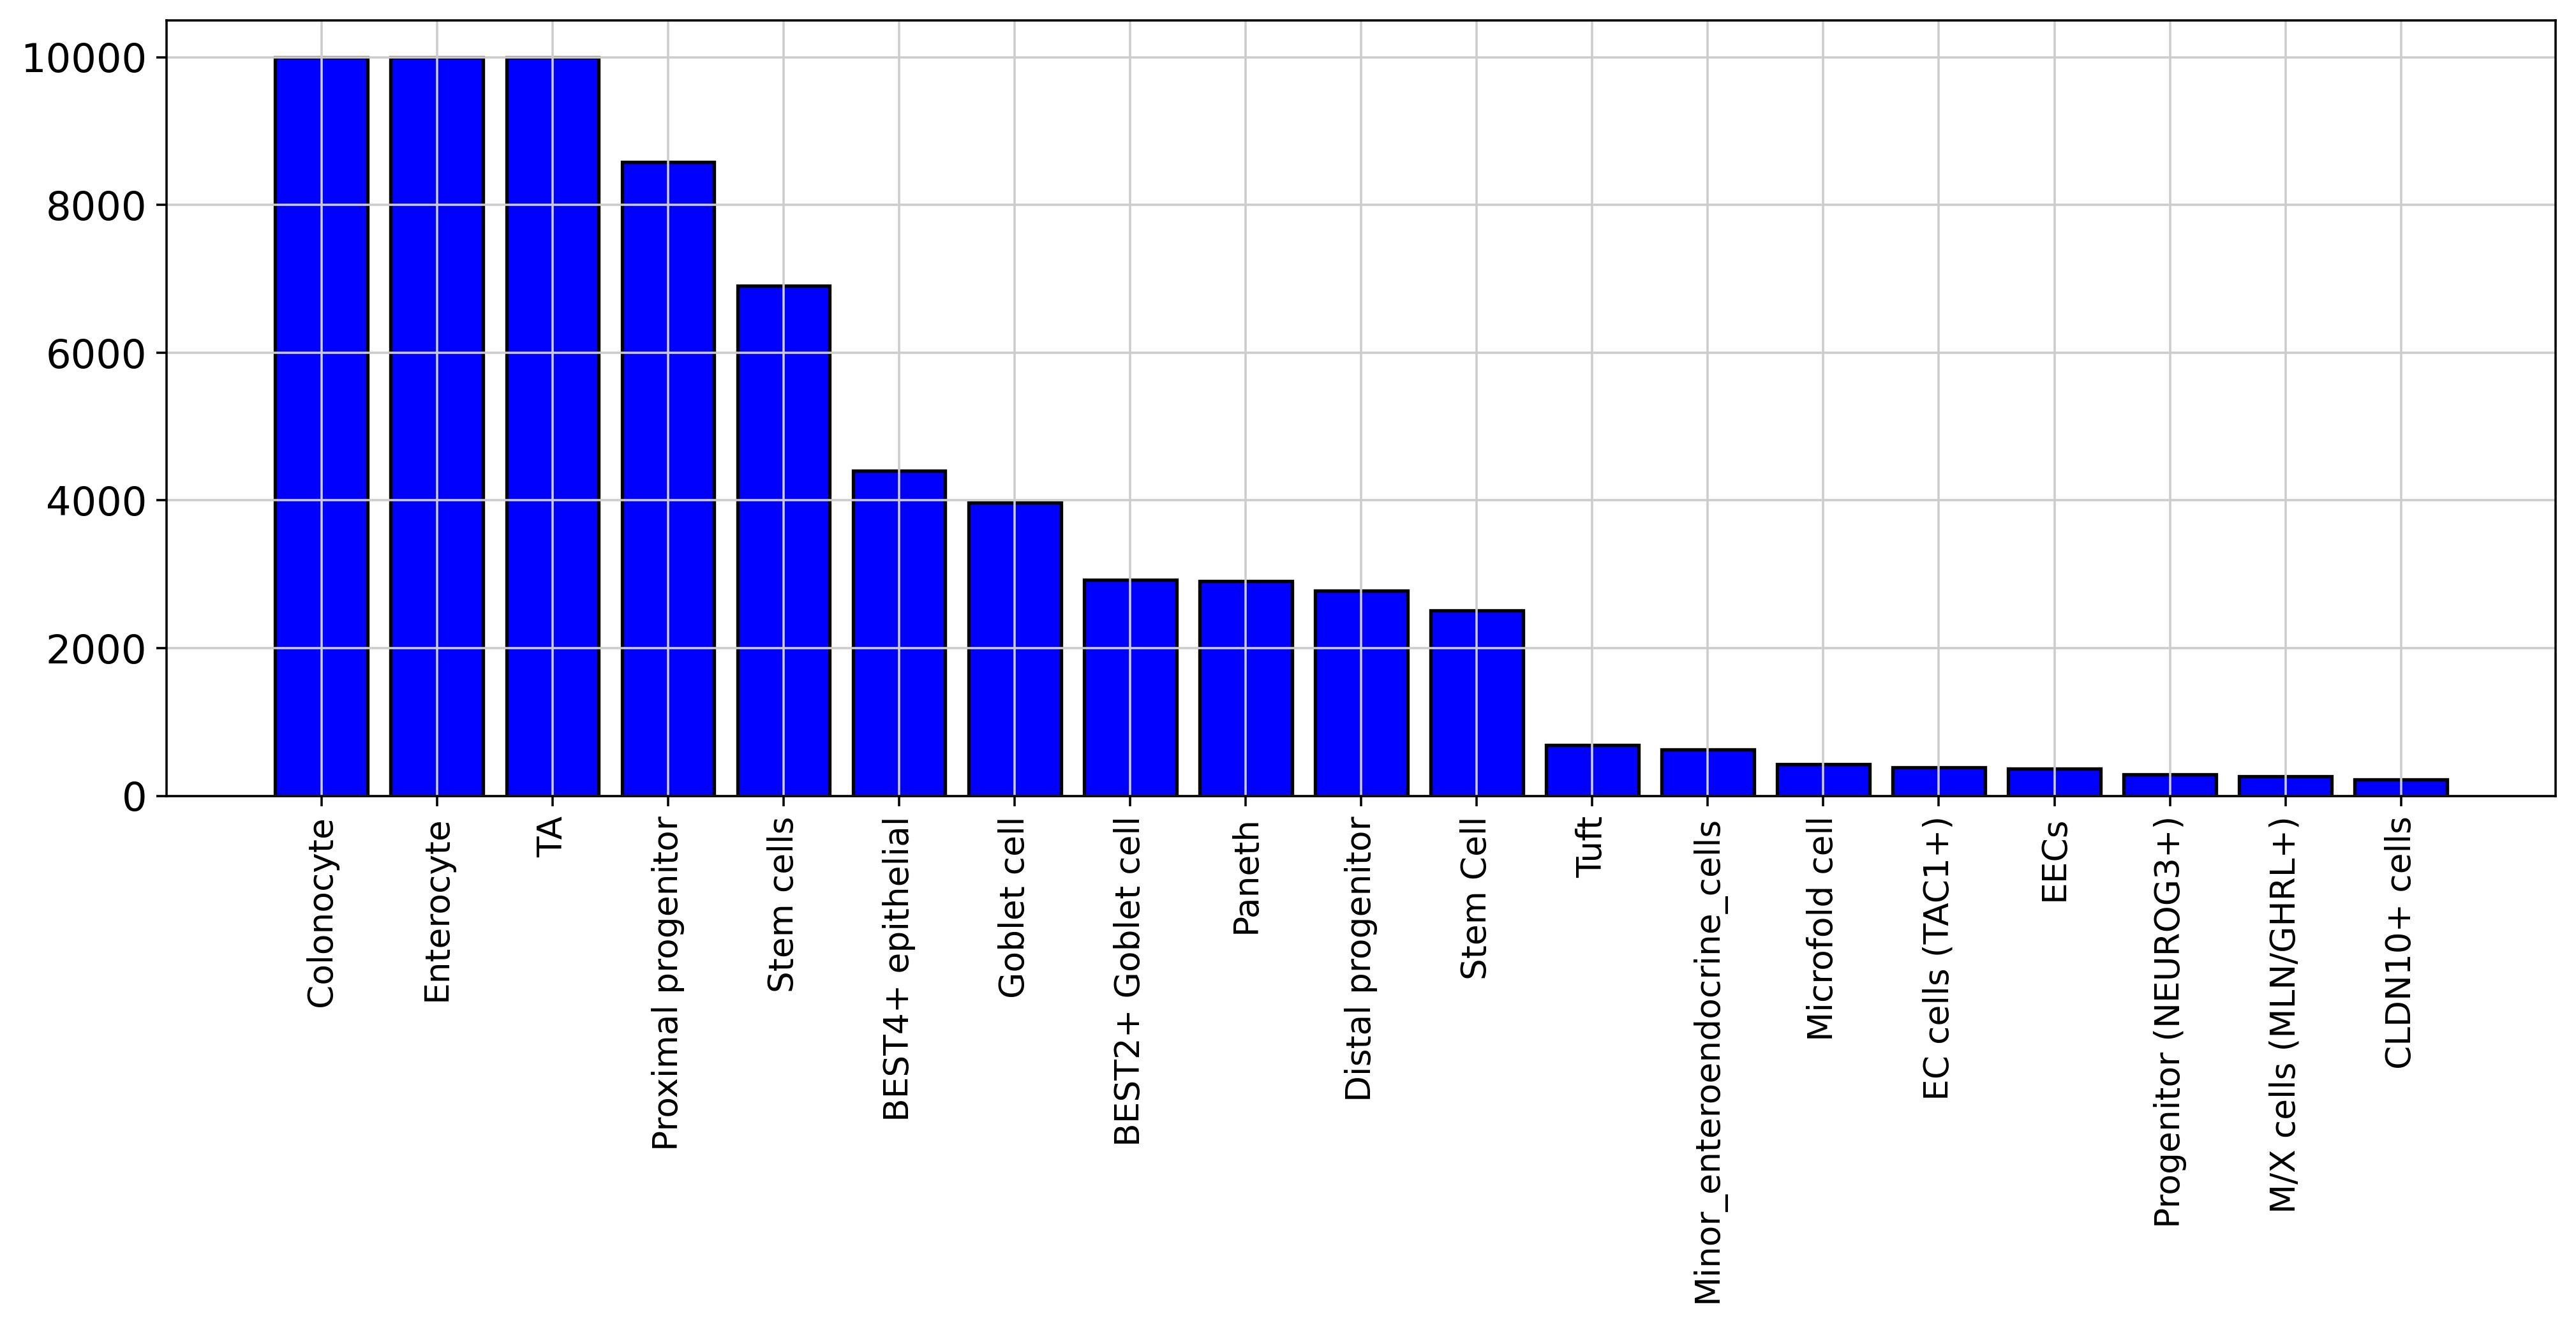

In [108]:
#Create a barplot of the number of cells per cell type in the anndata_pediatric object
plt.figure(figsize = (15, 5))
plt.bar(epithelial_cells_subset.obs["Integrated_05"].value_counts().index, epithelial_cells_subset.obs["Integrated_05"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)
matplotlib.pyplot.xticks(rotation = 90, fontsize = 12)

In [109]:
#Save the anndata_subset object
epithelial_cells_subset.write('/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/expi_map/Epithelial_reference_map_subset_after_geosketch.h5ad')

In [110]:
#Drop the anndata_subset object from the anndata object 
query_object = epithelial_cells[~epithelial_cells.obs_names.isin(epithelial_cells_subset.obs_names), :]

([0, 1, 2],
 [Text(0, 0, 'TA'), Text(1, 0, 'Enterocyte'), Text(2, 0, 'Colonocyte')])

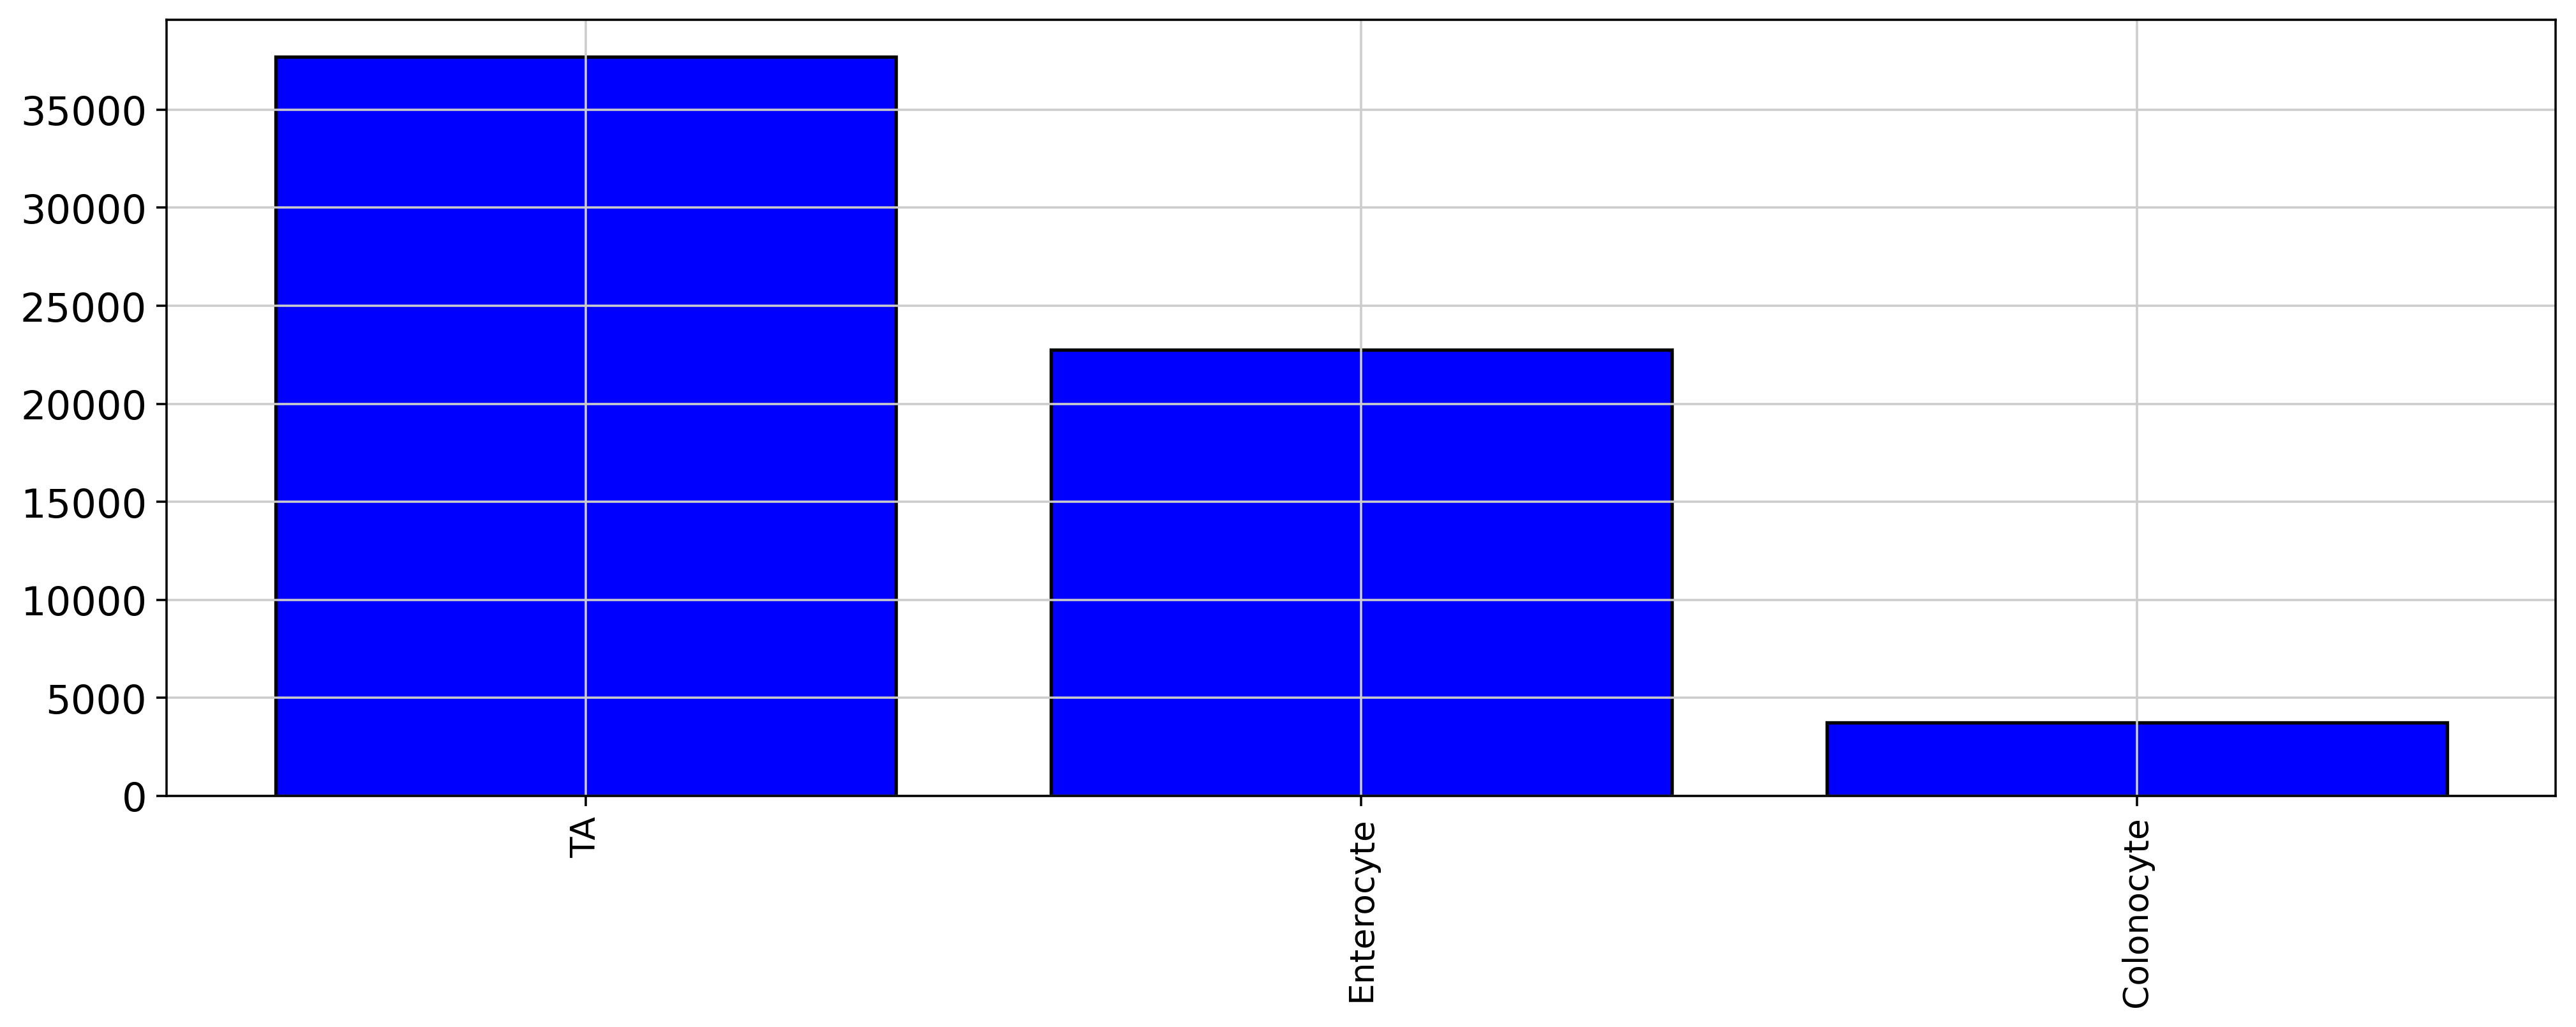

In [111]:
#Create a barplot of the number of cells per cell type in the anndata_pediatric object
plt.figure(figsize = (15, 5))
plt.bar(query_object.obs["Integrated_05"].value_counts().index, query_object.obs["Integrated_05"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)
matplotlib.pyplot.xticks(rotation = 90, fontsize = 12)

In [112]:
#Save the query_object object
query_object.write('/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/expi_map/Epithelial_query_map_after_geosketch.h5ad')

/home/icb/anna.maguza/miniconda3/envs/geosketch_env2/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/icb/anna.maguza/miniconda3/envs/geosketch_env2/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/icb/anna.maguza/miniconda3/envs/geosketch_env2/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/icb/anna.maguza/miniconda3/envs/geosketch_env2/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/icb/anna.maguza/miniconda3/envs/geosketch_env2/lib/python3.9/site-packages/anndata/_co